##  HW 2 Analysis Problems

Chase Carlson<br>GSCM 575 - Machine Learning for Business<br>The School of Business<br>Portland State University


## 1. Data Wrangling, Pre-Processing I

In [20]:
# Import datetime
from datetime import datetime as dt
now = dt.now()
print("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-07-03 at 20:07 PM


In [21]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Consider the following csv data file regarding houses and their average selling price in various geographical areas around Boston:

http://web.pdx.edu/~gerbing/data/Boston.csv 

There are 14 variables in the data file, described as follows:

1. crim - per capita crime rate by town
1. zn - proportion of residential land zoned for lots over 25,000 sq.ft.
1. indus - proportion of non-retail business acres per town.
1. chas - charles river dummy variable (1 if tract bounds river; 0 otherwise)
1. nox - nitric oxides concentration (parts per 10 million)
1. rm - average number of rooms per dwelling
1. age - proportion of owner-occupied units built prior to 1940
1. dis - weighted distances to five boston employment centers
1. rad - index of accessibility to radial highways
1. tax - full-value property-tax rate per 10,000 USD
1. ptratio - pupil-teacher ratio by town
1. "b - 1000(bk - 0.63)^2" where bk is the proportion of blacks by town
1. lstat - \% lower status of the population
1. medv - median value of owner-occupied homes in 1000's USD

*a.	Read the data file.*

In [215]:
# read in the data file
df = pd.read_csv("http://web.pdx.edu/~gerbing/data/Boston.csv")

# data frame imported with "unnamed column 0". Removing that column
df = df.drop(columns=df.columns[0]) 
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


*b.	How many examples (rows of data) are there in the data file?*

In [23]:
# check number of rows and columns
df.shape
# 506 rows, 14 columns

(506, 14)

*c.	List the first 5 rows and the variable names.*

In [24]:
# view first 5 rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


*d.	Transform _lstat_ from a percentage to a proportion. Do this by writing the usual equation for this transformation in the language of Pandas, perhaps first writing the expression on paper and then translate to Pandas notation. (Name the new variable anything you wish.) Verify by displaying the first six rows of the revised data frame.*

In [25]:
df['lstat'] = round(df['lstat']/100, 4)
df.head(6)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,0.0498,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,0.0914,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,0.0403,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,0.0294,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.0533,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,0.0521,28.7


In [29]:
# double-check new max and min values
print("lstat max: ", df['lstat'].max())
print("lstat min: ", df['lstat'].min())

lstat max:  0.3797
lstat min:  0.0173


*e.	Display just the average number of rooms for the second row of data.*

In [39]:
# use iloc to find the single value from row 2 of 'rm' column.
df['rm'].iloc[1:2]

1    6.421
Name: rm, dtype: float64

*f.	To build a model to forecast median house price, analysts wish to focus on three predictor variables: crim, rm, and rad. Display the first five rows of data for just these three variables.*  
*i. by specifying the variable names*  
*ii. by specifying the variable indices*

In [40]:
# Filter the first five rows of crim, rm, and rad using filter().
df2 = df.filter(['crim', 'rm', 'rad'])
df2.head()

,crim,rm,rad
0,0.00632,6.575,1
1,0.02731,6.421,2
2,0.02729,7.185,2
3,0.03237,6.998,3
4,0.06905,7.147,3


In [42]:
# Same thing using loc() 
df2 = df.loc[:, ['crim', 'rm', 'rad']]
df2.head()

,crim,rm,rad
0,0.00632,6.575,1
1,0.02731,6.421,2
2,0.02729,7.185,2
3,0.03237,6.998,3
4,0.06905,7.147,3


In [41]:
# Filter the first five rows of crim, rm, and rad by specifying the variable indices
df2 = df.iloc[:, [0, 5, 8]]
df2.head()

,crim,rm,rad
0,0.00632,6.575,1
1,0.02731,6.421,2
2,0.02729,7.185,2
3,0.03237,6.998,3
4,0.06905,7.147,3


*g. List all the rows of data with the median value of the home less than \$8000.*

In [212]:
# Find all rows with median home value of less than $8000
# filter all values in medv column less than 8 (in 1000s)
df.query('medv < 8') 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,0.3081,7.2
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,0.3199,7.4
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,0.3059,5.0
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,0.2997,6.3
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,0.2677,5.6
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,0.2032,7.2
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,0.2298,5.0
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,0.3698,7.0
415,18.08460,0.0,18.10,0,0.679,6.434,100.0,1.8347,24,666,20.2,27.25,0.2905,7.2
416,10.83420,0.0,18.10,0,0.679,6.782,90.8,1.8195,24,666,20.2,21.57,0.2579,7.5


*h.	Use code (i.e., do not manually count) to display the number of homes with median value < $8000.*

In [56]:
# Count the number of homes with median value < 8
homes = df.query('medv < 8')['medv'].count()
print("Number of homes with medv < $8000: ", (homes))

Number of homes with medv < $8000:  11


*i.	Analysts want to build a model to forecast the median value of a house. Construct the box plot of the corresponding variable medv.*

[Text(0.5, 0, 'Median Value of Owner-Occupied Homes')]

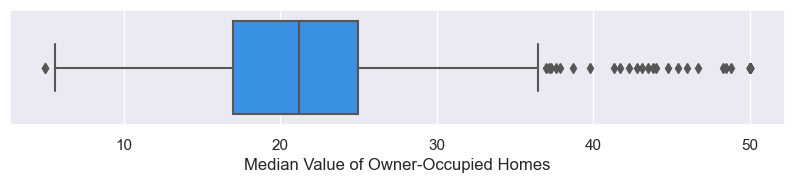

In [67]:
# Use seaborn to create boxplot for the variable medv
plot = sns.boxplot(x=df['medv'], color='dodgerblue')

# Resize the figure
sns.set(rc={'figure.figsize': (10, 1)})

# Addd axis label
plot.set(xlabel='Median Value of Owner-Occupied Homes')

*j.	Describe the distribution of medv from the box plot including any outliers.*

The data within the medv column is highly dispersed, with a range from 5-50. The mean is 22.53 and the median is 21.2. The middle 50% of values lie between 17 and 25, and the standard deviation is just over 9. There are a number of potential outliers with high values that skew the data to the right, and there is at least one potential outlier at the bottom end of the range. 

In [97]:
# Summary of statistics
round(df.describe()['medv'], 2)


count    506.00
mean      22.53
std        9.20
min        5.00
25%       17.02
50%       21.20
75%       25.00
max       50.00
Name: medv, dtype: float64

*k.	For the three predictor variables of interest, rescale into a data object called X three ways, each time showing the first five rows of rescaled data.*  
*i. MinMax, and also show the minimum and maximum of the rescaled variables*  
*ii. Standardize, and also show the mean and standard deviation of the rescaled variables and comment on their respective sizes*  
*iii. Robust Scale*

#### Pre-processing

In [98]:
# Import sklearn preprocessing module
from sklearn import preprocessing

In [107]:
# View data types of predictor variables.
df[['crim', 'rm', 'rad']].dtypes 

crim    float64
rm      float64
rad       int64
dtype: object

In [111]:
# # Subset the predictor variables (crim, rm, & rad) into their own data frame
X = df[['crim', 'rm', 'rad']].copy()

# convert 'rad' from int64 to float64
X.loc[:, 'rad'] = X.loc[:, 'rad'].astype('Float64') 
X.head()

,crim,rm,rad
0,0.00632,6.575,1.0
1,0.02731,6.421,2.0
2,0.02729,7.185,2.0
3,0.03237,6.998,3.0
4,0.06905,7.147,3.0


##### i. Scale using MinMax

In [112]:

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 

# create mm_scaler instance
mm_scaler = preprocessing.MinMaxScaler() 

In [115]:
# Transform X using MinMaxScaler
Xmm = mm_scaler.fit_transform(X)

# View object type
type(Xmm)


numpy.ndarray

In [117]:
# Transform Xmm into a data frame and view first 5 rows
Xmm = pd.DataFrame(Xmm, columns=['crim', 'rm', 'rad'])
Xmm.head()

,crim,rm,rad
0,0.000000,0.577505,0.000000
1,0.000236,0.547998,0.043478
2,0.000236,0.694386,0.043478
3,0.000293,0.658555,0.086957
4,0.000705,0.687105,0.086957


In [127]:
# View Min values
Xmm.min()

crim    0.0
rm      0.0
rad     0.0
dtype: float64

In [128]:
# View Max values
Xmm.max()

crim    1.0
rm      1.0
rad     1.0
dtype: float64

#### ii. Scale using Standardization

In [120]:
# Import module
from sklearn.preprocessing import StandardScaler

# create s_scalar instance
s_scaler = preprocessing.StandardScaler() 

In [143]:
# Transform using Standard Scaler
Xst = s_scaler.fit_transform(X) 

# transform result back to data frame
Xst = pd.DataFrame(Xst, columns=['crim', 'rm', 'rad']) 
Xst.head()

,crim,rm,rad
0,-0.419782,0.413672,-0.982843
1,-0.417339,0.194274,-0.867883
2,-0.417342,1.282714,-0.867883
3,-0.416750,1.016303,-0.752922
4,-0.412482,1.228577,-0.752922


In [144]:
# View the mean
round(Xst.mean(), 4)

crim   -0.0
rm     -0.0
rad    -0.0
dtype: float64

In [145]:
# View standard deviation
round(Xst.std(), 4)

crim    1.001
rm      1.001
rad     1.001
dtype: float64

The mean of 0 and standard deviation of 1 represents a normal distribution of data. This ensures that the distribution of the data points is similar across different variables.

#### iii. Robust Scale

In [147]:
# Import sklearn module
from sklearn.preprocessing import RobustScaler
r_scaler = preprocessing.RobustScaler()

In [148]:
# Transform X using RobustScaler
Xrb = r_scaler.fit_transform(X)

# convert Xrb back to data frame
Xrb = pd.DataFrame(Xrb, columns=['crim', 'rm', 'rad']) 
Xrb.head()

,crim,rm,rad
0,-0.069593,0.496612,-0.20
1,-0.063755,0.287940,-0.15
2,-0.063760,1.323171,-0.15
3,-0.062347,1.069783,-0.10
4,-0.052144,1.271680,-0.10


In [151]:
# View mean
round(Xrb.mean(), 4)

crim    0.9338
rm      0.1032
rad     0.2275
dtype: float64

In [153]:
# View standard deviation
round(Xrb.std(), 4)

crim    2.3926
rm      0.9521
rad     0.4354
dtype: float64

In [152]:
# View min
round(Xrb.min(), 4)

crim   -0.0696
rm     -3.5874
rad    -0.2000
dtype: float64

In [154]:
# View max
round(Xrb.max(), 4)

crim    24.6784
rm       3.4844
rad      0.9500
dtype: float64

## 2.	Data Wrangling, Pre-Processing II 

Data: http://web.pdx.edu/~gerbing/data/SupermarketTransactions.xlsx (sample data from Tableau)

In [170]:
# read in data
supermarket = pd.read_excel('http://web.pdx.edu/~gerbing/data/SupermarketTransactions.xlsx')
supermarket.head()

,Transaction,Purchase,Customer,Gender,Marital,Homeowner,Children,Income,City,State,Country,Family,Dept,Category,Units_Sold,Revenue
0,1,2015-12-17,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2015-12-19,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2015-12-20,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2015-12-20,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2015-12-21,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00


a.	_How many examples, rows of data? Columns of data?_

In [171]:
# View shape
supermarket.shape
# 14059 rows, 16 columns

(14059, 16)

b.	_Convert the value of Country, USA, to USofA. Verify. (Always verify the data after a transformation.)_

In [172]:
# Replace USA with USofA targeting the 'Country' column
supermarket = supermarket.replace({'Country': {'USA': 'USofA'}})
supermarket.head()

,Transaction,Purchase,Customer,Gender,Marital,Homeowner,Children,Income,City,State,Country,Family,Dept,Category,Units_Sold,Revenue
0,1,2015-12-17,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USofA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2015-12-19,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USofA,Food,Produce,Vegetables,5,14.90
2,3,2015-12-20,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USofA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2015-12-20,9619,M,M,Y,3,$30K - $50K,Portland,OR,USofA,Food,Snacks,Candy,4,4.44
4,5,2015-12-21,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USofA,Drink,Beverages,Carbonated Beverages,4,14.00


c. _Identify the three countries in the data for the cateogrical variable Country._

In [173]:
# Find unique values for Country
supermarket['Country'].unique()
# The three countries are USofA, Mexico, and Canada

array(['USofA', 'Mexico', 'Canada'], dtype=object)

d.	_Sales took place in three countries.  Convert the categorical variable Country to dummy variables for later numerical processing. What country gets dropped in the conversion?_

In [174]:
# use pd.get_dummies to create dummy variables for Country
supermarket = pd.get_dummies(supermarket, columns=['Country'], drop_first=True)
supermarket.head()
# Canada gets dropped because it was alphabetically first.

,Transaction,Purchase,Customer,Gender,Marital,Homeowner,Children,Income,City,State,Family,Dept,Category,Units_Sold,Revenue,Country_Mexico,Country_USofA
0,1,2015-12-17,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,Food,Snack Foods,Snack Foods,5,27.38,0,1
1,2,2015-12-19,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,Food,Produce,Vegetables,5,14.90,0,1
2,3,2015-12-20,8374,F,M,N,2,$50K - $70K,Bremerton,WA,Food,Snack Foods,Snack Foods,3,5.52,0,1
3,4,2015-12-20,9619,M,M,Y,3,$30K - $50K,Portland,OR,Food,Snacks,Candy,4,4.44,0,1
4,5,2015-12-21,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,Drink,Beverages,Carbonated Beverages,4,14.00,0,1


## 3. Missing Data

Data:  http://web.pdx.edu/~gerbing/data/employee.xlsx

In [190]:
# read in data
emp = pd.read_excel('http://web.pdx.edu/~gerbing/data/employee.xlsx')
emp.head()

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
0,"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
1,"Wu, James",NaN,M,SALE,94494.58,low,1,62,74
2,"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
4,"Downs, Deborah",7.0,W,FINC,57139.90,high,2,90,86


*a.	How many examples (rows of data) are there in the data file?*

In [191]:
# View shape of emp
emp.shape
# 37 rows, 9 columns

(37, 9)

*b.	Display rows of data that include the row of data with the missing data.*

In [192]:
# View all rows that contain missing data
emp[emp.isna().any(axis='columns')]

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
1,"Wu, James",NaN,M,SALE,94494.58,low,1,62,74
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
30,"Korhalkar, Jessica",2.0,W,ACCT,72502.50,NaN,2,74,87


*c.	Impute the median for the missing data of Years employed at the company. (Verify, as always.)*

In [193]:
# Isolate the variable
X = emp.filter(['Years'])
X.head()

,Years
0,7.0
1,NaN
2,15.0
3,5.0
4,7.0


In [194]:
# Transform using SimpleImputer
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')

# fit to isolated variable
imp_med = imp_med.fit(X) 

# execute transformation
X = imp_med.transform(X) 

In [200]:
# Transform result back into data frame and verify transformation applied properly
empX = pd.DataFrame(X, columns=['Years'])
print(empX.head())
print("median value: ", empX['Years'].median()) # verify the median value

   Years
0    7.0
1    9.0
2   15.0
3    5.0
4    7.0
median value:  9.0


Or we can update the original data frame to add the missing values:

In [213]:
# Import SimpleImputer module
from sklearn.impute import SimpleImputer

# Create instance using median as the strategy
imp_med = SimpleImputer(strategy='median') 

# Select the 'Years' column and convert it to a numpy array
years_col = emp[['Years']].values 

# Fit the imputer on the 'Years' data
imp_med.fit(years_col) 

# Transform and impute the missing values in the 'Years' column
imputed_years = imp_med.transform(years_col) 

# Update the 'Years' column in the original DataFrame
emp['Years'] = imputed_years 
emp.head()

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
0,"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
1,"Wu, James",9.0,M,SALE,94494.58,low,1,62,74
2,"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
4,"Downs, Deborah",7.0,W,FINC,57139.90,high,2,90,86


*d.	Display rows of data that include the row of data with the imputed data to verify that the missing data has been properly imputed to show the change from missing to the imputed median for each variable.*

In [210]:
# Display specific row affected by the transformation
emp.iloc[1]

Name      Wu, James
Years           9.0
Gender            M
Dept           SALE
Salary     94494.58
JobSat          low
Plan              1
Pre              62
Post             74
Name: 1, dtype: object

In [211]:
# Or wider view. Row containing James Wu has been imputed with 9.0.
emp.head()

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
0,"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
1,"Wu, James",9.0,M,SALE,94494.58,low,1,62,74
2,"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
4,"Downs, Deborah",7.0,W,FINC,57139.90,high,2,90,86
